In [13]:
import numpy as np
import matplotlib.pyplot as plt

def random_argmax(q_values):
    return np.random.choice(np.flatnonzero(q_values == q_values.max()))

def run_bandit(epsilon, initial_value, alpha=0.1, steps=1000, k=10):
    true_q = np.random.randn(k)
    optimal_arm = np.argmax(true_q)

    q = np.full(k, initial_value, dtype=float)
    optimal_action = np.zeros(steps)

    for t in range(steps):
        if np.random.rand() < epsilon:
            a = np.random.randint(k)
        else:
            a = random_argmax(q)

        r = np.random.randn() + true_q[a]
        q[a] += alpha * (r - q[a])
        optimal_action[t] = (a == optimal_arm)

    return optimal_action


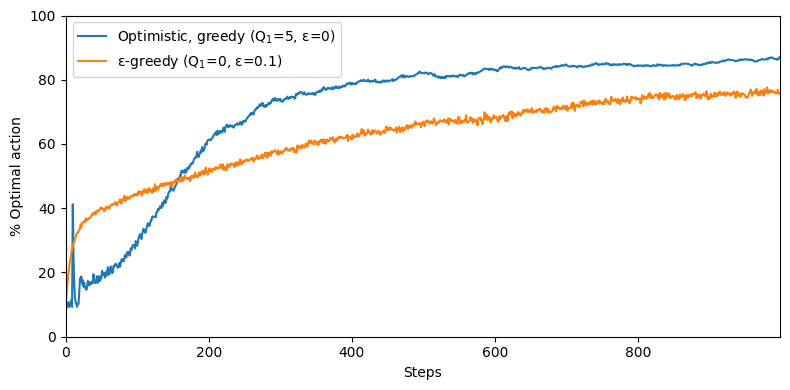

In [14]:
runs = 2000
steps = 1000
optimistic = np.zeros(steps)
egreedy = np.zeros(steps)

for _ in range(runs):
    optimistic += run_bandit(epsilon=0.0, initial_value=5.0)
    egreedy    += run_bandit(epsilon=0.1, initial_value=0.0)

optimistic /= runs
egreedy    /= runs

plt.figure(figsize=(8,4))
plt.plot(optimistic * 100, label='Optimistic, greedy (Q$_1$=5, ε=0)', color='C0')
plt.plot(egreedy * 100,    label='ε-greedy (Q$_1$=0, ε=0.1)', color='C1')
plt.xlabel('Steps')
plt.ylabel('% Optimal action')
plt.ylim(0, 100)
plt.xlim(0, steps-1)
plt.legend()
plt.tight_layout()
plt.show()